# Foward

In [4]:
from TO_sim.analytical.sec_order_parameter import *
from parmap import parmap
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')


In [5]:
Ks = np.arange(0.1,10+0.05,0.1)
ms = np.arange(0.1,10+0.05,0.1)

In [6]:
df = pd.DataFrame(columns=['K','m','r_mean_u','r_mean_d','r_main_u','r_main_d','r_sec_u','r_sec_d'])
df = df.set_index(['K','m'])


In [ ]:
for m in tqdm(ms):
    r_ds,r_us  = rm_numpy(Ks,m,samples=20)
    r_mds = F_l1(r_ds,Ks,m)*(Ks*r_ds)
    r_mus = F_l1(r_us,Ks,m)*(Ks*r_us)
    r_sds,r_sus = rs_numpy(Ks,m,r_us,samples=100)
    for K,r_d,r_u,r_md,r_mu,r_sd,r_su in zip(Ks,r_ds,r_us,r_mds,r_mus,r_sds,r_sus):
        df.loc[(K,m),'r_mean_d'] = r_d
        df.loc[(K,m),'r_mean_u'] = r_u
        df.loc[(K,m),'r_main_d'] = r_md
        df.loc[(K,m),'r_main_u'] = r_mu
        df.loc[(K,m),'r_sec_d'] = r_sd
        df.loc[(K,m),'r_sec_u'] = r_su

  0%|          | 0/100 [00:00<?, ?it/s]

# Backward

In [7]:
Ks = np.arange(0.1,10+0.05,0.1)
ms = np.arange(0.1,10+0.05,0.1)

In [12]:
df_b = pd.DataFrame(columns=['K','m','r_mean_u','r_mean_d','r_main_u','r_main_d','r_sec_u','r_sec_d'])
df_b = df_b.set_index(['K','m'])

In [13]:
for m in tqdm(ms):
    r_ds,r_us  = rm_b_numpy(Ks,m,samples=20)
    r_mds = F_l1b(r_ds,Ks,m)*(Ks*r_ds)
    r_mus = F_l1b(r_us,Ks,m)*(Ks*r_us)
    r_sds,r_sus = rs_numpy(Ks,m,r_us,samples=100)
    for K,r_d,r_u,r_md,r_mu,r_sd,r_su in zip(Ks,r_ds,r_us,r_mds,r_mus,r_sds,r_sus):
        df_b.loc[(K,m),'r_mean_d'] = r_d
        df_b.loc[(K,m),'r_mean_u'] = r_u
        df_b.loc[(K,m),'r_main_d'] = r_md
        df_b.loc[(K,m),'r_main_u'] = r_mu
        df_b.loc[(K,m),'r_sec_d'] = r_sd
        df_b.loc[(K,m),'r_sec_u'] = r_su

  0%|          | 0/100 [00:00<?, ?it/s]

0.5763631578947368
nan
nan
nan


In [17]:
df_b.sort_index().to_excel(f'Order parameter and secondary cluster backward.xlsm')

In [18]:
df = df_b

In [20]:
df

,,r_mean_u,r_mean_d,r_main_u,r_main_d,r_sec_u,r_sec_d
K,m,,,,,,
0.1,0.1,NaN,NaN,NaN,NaN,NaN,NaN
0.2,0.1,NaN,NaN,NaN,NaN,NaN,NaN
0.3,0.1,NaN,NaN,NaN,NaN,NaN,NaN
0.4,0.1,NaN,NaN,NaN,NaN,NaN,NaN
0.5,0.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9.6,10.0,0.973687,0.003389,0.994227,0.020386,NaN,NaN
9.7,10.0,0.973687,0.003389,0.994346,0.020598,NaN,NaN
9.8,10.0,0.973687,0.003389,0.994462,0.020811,NaN,NaN


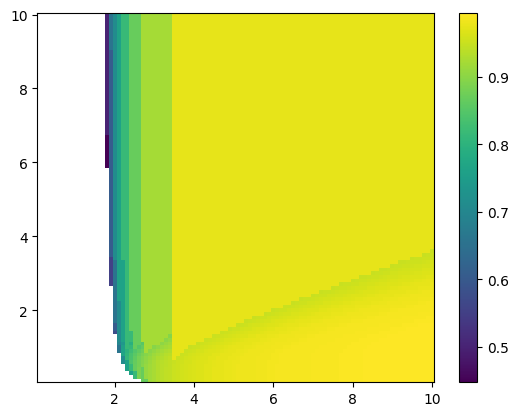

In [32]:
# plt.imshow(df_new['p_o_0'].unstack().to_numpy().T)
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
# plt.pcolormesh(KK,MM,df_new['main_o'].unstack().to_numpy().T)
plt.pcolormesh(KK,MM,df['r_mean_u'].unstack().to_numpy(float).T)
plt.colorbar()

## Check analytic

In [33]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0, dK_graph, Make_empirical_KR as KR, split_uo
from TO_sim.gen_Distribution import Normal, Quantile_Normal as Q_Normal, Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets as mf2_sets
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_not0 as mf2_sets_TLO
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2

from TO_sim.get_cluster import C_rsmso, cluster_os, C_rsmso_set_new
from TO_sim.To_Draw import Draw_avg_vel_r

max_c = 3e-4

In [ ]:
np.save(f'231024 secondary cluster/N={N},K={K} r_std',r_std_sets)
np.save(f'231024 secondary cluster/N={N},K={K} r_mean',r_mean_sets)

In [52]:
N_100 =np.load('231024 secondary cluster/N=100,K=5 r_std.npy',allow_pickle=True).tolist()
N_250 =np.load('231024 secondary cluster/N=250,K=5 r_std.npy',allow_pickle=True).tolist()

N_500 =np.load('231024 secondary cluster/N=500,K=5 r_std.npy',allow_pickle=True).tolist()
N_1000 =np.load('231024 secondary cluster/N=1000,K=5 r_std.npy',allow_pickle=True).tolist()
N_2000 =np.load('231024 secondary cluster/N=2000,K=5 r_std.npy',allow_pickle=True).tolist()


In [53]:
NM_100 =np.load('231024 secondary cluster/N=100,K=5 r_mean.npy',allow_pickle=True).tolist()
NM_250 =np.load('231024 secondary cluster/N=250,K=5 r_mean.npy',allow_pickle=True).tolist()
NM_500 =np.load('231024 secondary cluster/N=500,K=5 r_mean.npy',allow_pickle=True).tolist()
NM_1000 =np.load('231024 secondary cluster/N=1000,K=5 r_mean.npy',allow_pickle=True).tolist()
NM_2000 =np.load('231024 secondary cluster/N=2000,K=5 r_mean.npy',allow_pickle=True).tolist()


In [ ]:
m_set = np.linspace(3,6,31,endpoint=True).reshape(-1,1)

In [38]:
N_set = 31
m_set = np.linspace(3.0,6.0,N_set,endpoint=True).reshape(-1,1)

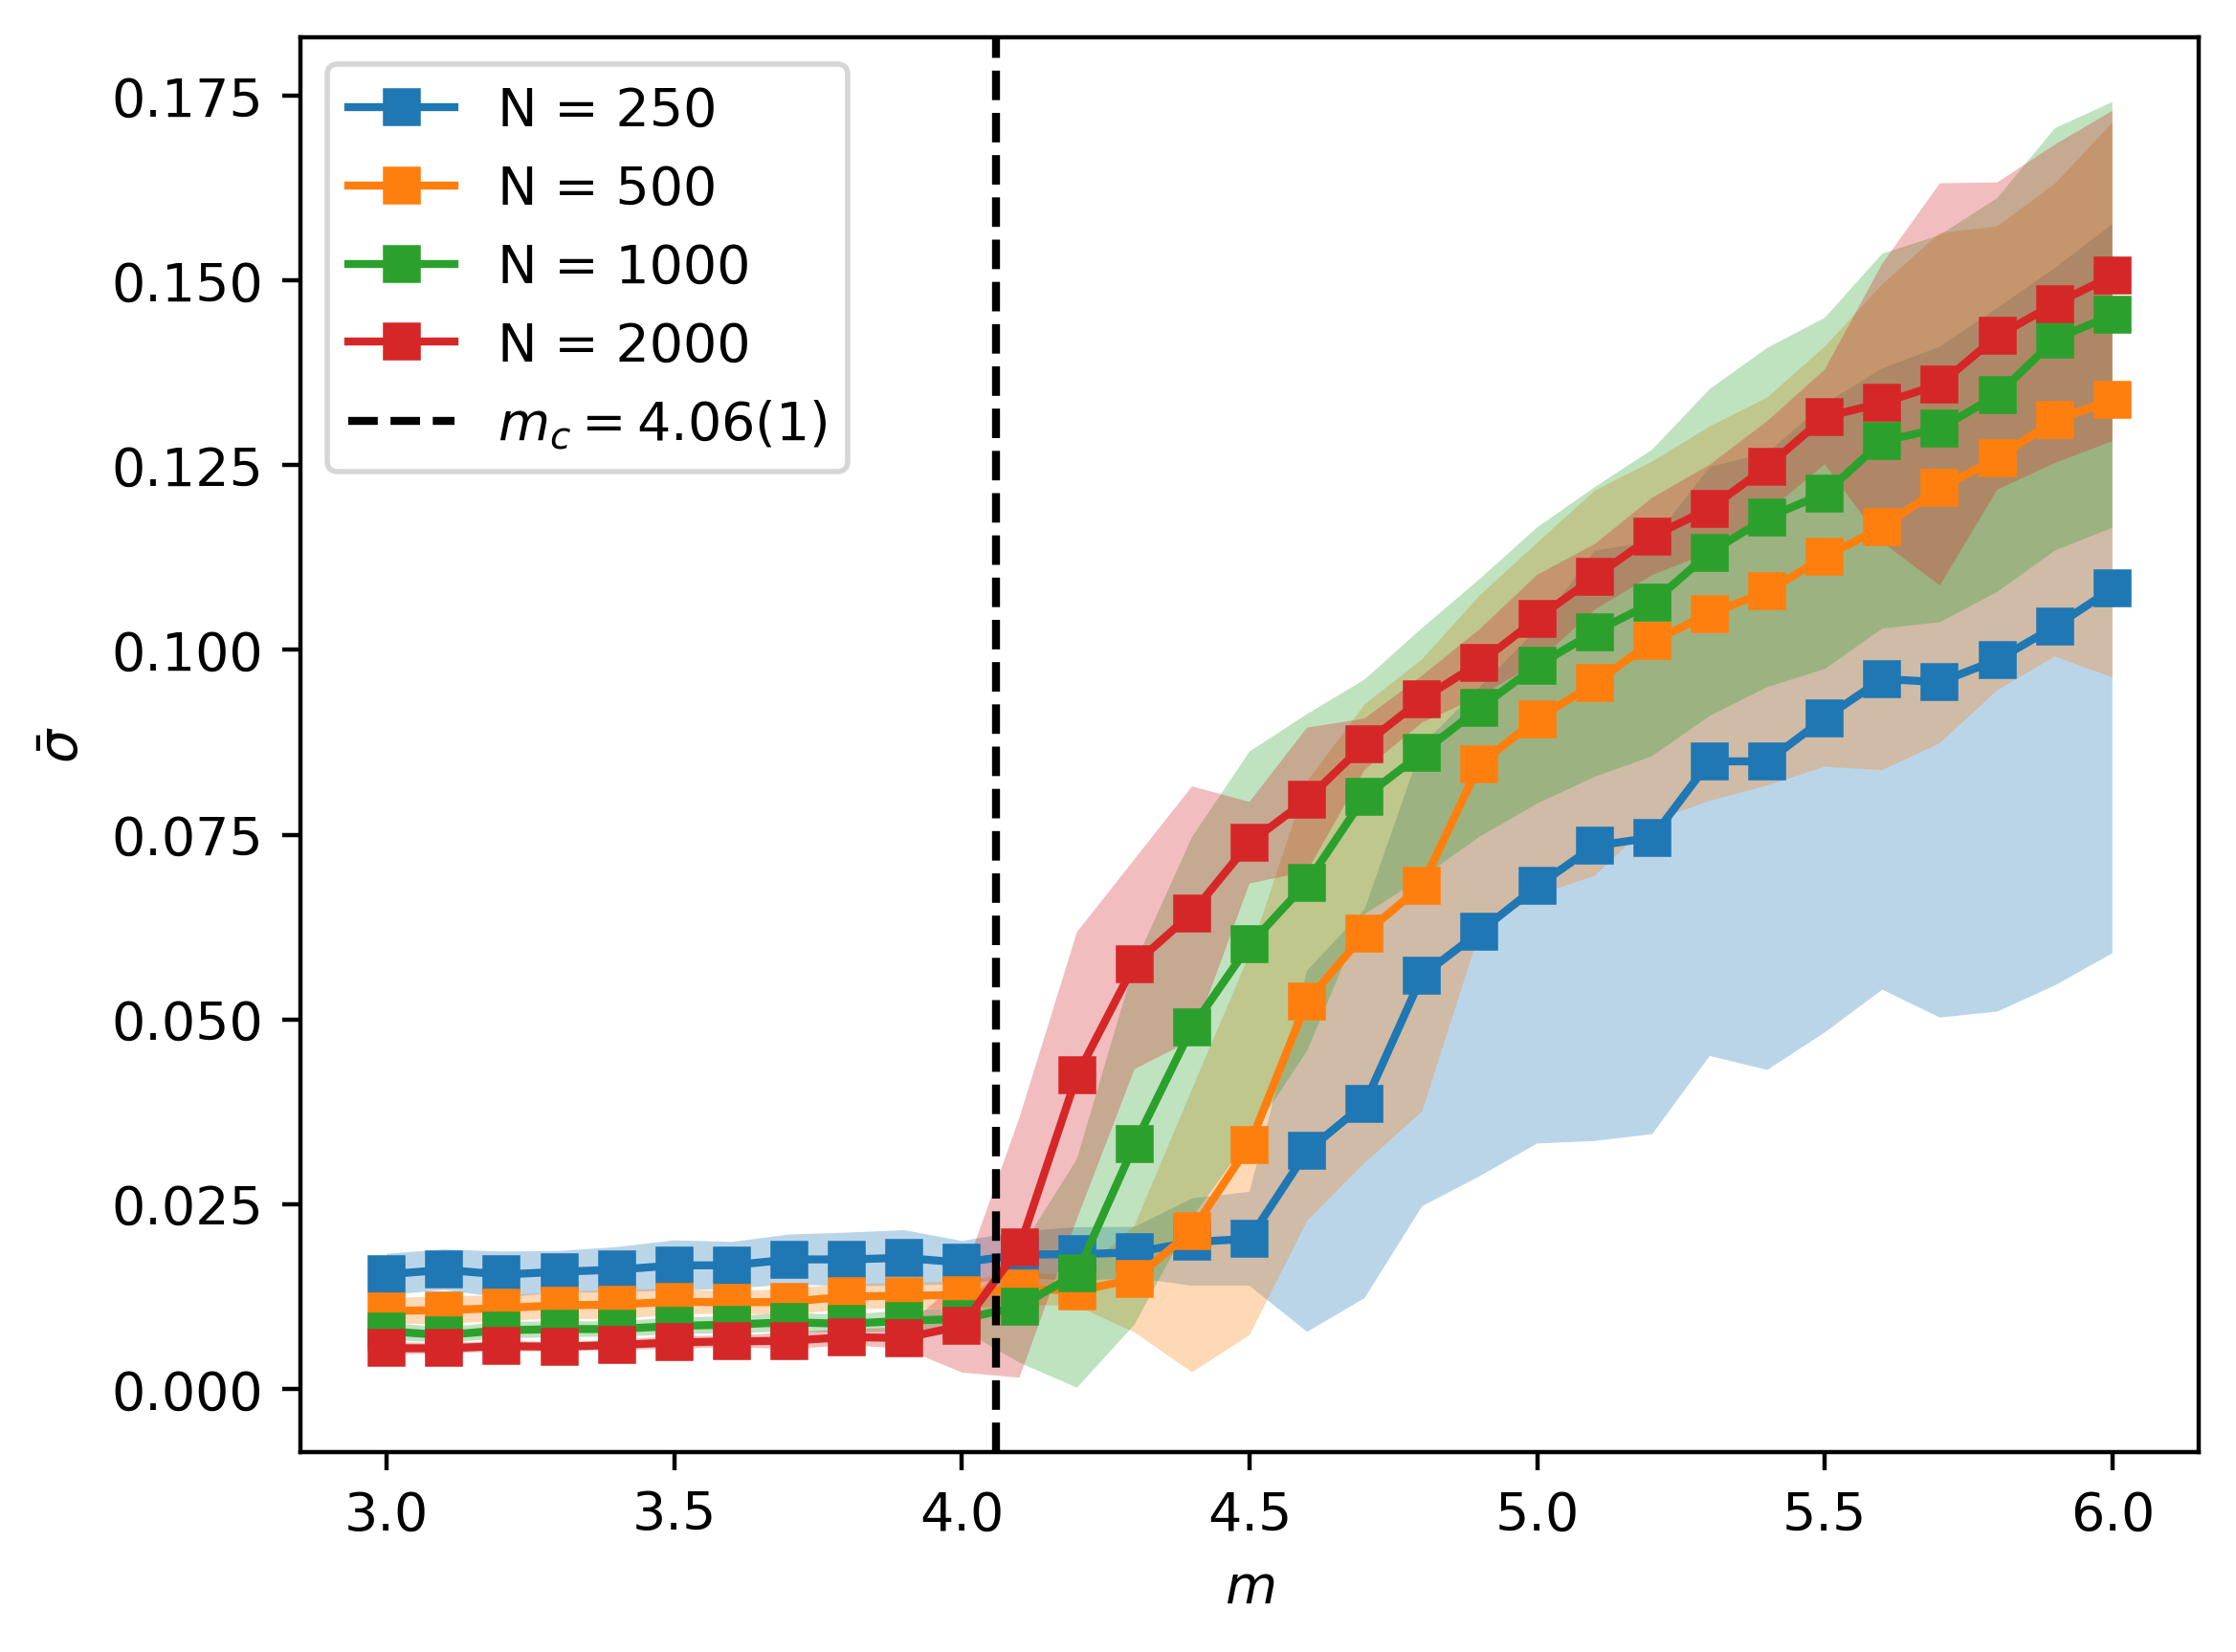

In [55]:
plt.figure(dpi=400)
for N_sets,r_means,N in zip([N_250,N_500,N_1000,N_2000],[NM_250,NM_500,NM_1000,NM_2000],[250,500,1000,2000]):
    A = np.array([*N_sets.values()])
    B = np.array([*r_means.values()])
    B = np.where(B>0.2,A,np.nan)
    # print(sum(np.isnan(B)))
    # As = np.where(A>20e-3,A,np.nan)
    As = B
    r_std_means = np.nanmean(As,axis=0)
    r_std_stds = np.nanstd(As,axis=0)
    plt.plot(m_set.reshape(-1),r_std_means,'s-',label=f'N = {N}')
    plt.fill_between(m_set.reshape(-1),r_std_means-r_std_stds,r_std_means+r_std_stds,alpha=0.3)
plt.axvline(4.06,color='black',ls='--',label='$m_c=4.06(1)$')
plt.ylabel(r'$\bar{\sigma}$')
plt.xlabel('$m$')
plt.legend()


array([[0.81632212, 0.80588807, 0.79552153, ..., 0.54595133, 0.56640695,
        0.55101462],
       [0.81767969, 0.80860754, 0.79614019, ..., 0.55804356, 0.54494128,
        0.54441436],
       [0.81498204, 0.80594736, 0.7942151 , ..., 0.5896872 , 0.58469367,
        0.57422569],
       ...,
       [0.81498515, 0.80723331, 0.79424376, ..., 0.56563678, 0.56317995,
        0.53474041],
       [0.81430254, 0.80391075, 0.79421686, ..., 0.570491  , 0.55306693,
        0.55448747],
       [0.81497475, 0.80524234, 0.79689491, ..., 0.56033846, 0.54445875,
        0.54500695]])

In [ ]:
r_std > 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

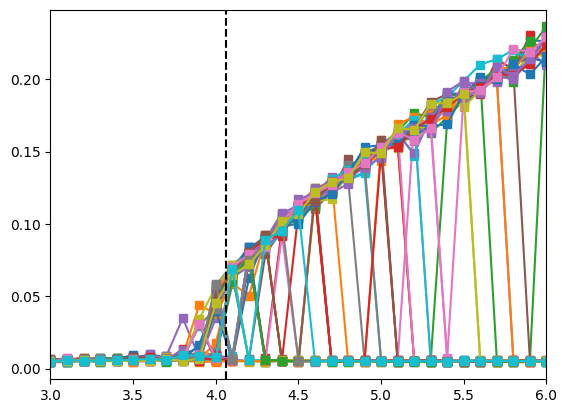

In [ ]:
for seed,r_std in N_4000.items():
    # r_stds = np.where(r_std>20e-3,r_std,np.nan)
    plt.plot(m_set,r_std*np.sqrt(2),'s-')

    plt.grid()
    plt.xlim(3,6)
plt.axvline(4.06,color='black',ls='--',label='$m_c=4.06(1)$')

# plt.plot(ms,r_su,label='r_main')

## Order parameter check again

In [1]:
from TO_sim.analytical.sec_order_parameter import *
from parmap import parmap
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')


In [3]:
def Bisection(f,r_a,r_b,eps =1e-5,end=30,arg=()):
    r_c = (r_a+r_b)/2
    num = 0 
    
    while abs(f(r_c,*arg))>eps:
        r_c = (r_a+r_b)/2
        if f(r_a,*arg)*f(r_c,*arg)>0:
            r_a = r_c
        else:
            r_b = r_c
        num+=1
        if num >end:
            # print('Please select another section')
            return np.NAN
    # print(f'count : {num}')
    return r_c


In [13]:
def r_lock1(r,K,m,g=g_n):
    X = K*r
    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x))
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,limit=200)
        return X*I_l

    else: 
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
        return X*I_l

def r_drift1(r,K,m,g=g_n):
    X = K*r
    O_p = (4/np.pi)*np.sqrt(X/m)
    integrand_drift = lambda x:1/(x**2)*g(x)
    I_d,err = quad(integrand_drift,O_p,np.inf,limit=200)
    return -X/(m)*I_d

def r_mean_Kr(Kr,m,g=g_n):
    X = Kr
    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x))
    omega_p = (4/np.pi)*np.sqrt(X/m)
    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,limit=200)
    else: 
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
    O_p = (4/np.pi)*np.sqrt(X/m)
    integrand_drift = lambda x:1/(x**2)*g(x)
    I_d,err = quad(integrand_drift,O_p,np.inf,limit=200)
    rl = X*I_l
    rd = -X/(m)*I_d
    return rl+rd
def r_mean(r,K,m,g=g_n):
    rl = r_lock1(r,K,m,g=g_n)
    rd = r_drift1(r,K,m,g=g_n)
    return rl+rd - r

In [93]:
def get_r_mean(K,m,Kb,rb,end=30):
    r_d,r_u = np.nan,np.nan
    if K<Kb:
        return r_d,r_u
    else:
        r_u = Bisection(r_mean,rb,1,end=end,arg = (K,m,g_n))
        r_d = Bisection(r_mean,0.01,rb,end=10,arg = (K,m,g_n))
    return r_d,r_u

In [94]:
rm_numpy = np.vectorize(get_r_mean)
rmKr_numpy = np.vectorize(r_mean_Kr)

In [95]:
Kr = np.logspace(np.log10(0.1),np.log10(10),num=500,base=10)
R = rmKr_numpy(Kr,4)
Kb =1/np.nanmax((R/Kr))
rb = Kr[np.nanargmax((R/Kr))]*np.nanmax((R/Kr))

In [73]:
R = rmKr_numpy(Kr,4)

In [96]:
rs_d,rs_u = rm_numpy(Ks,4,Kb,rb)

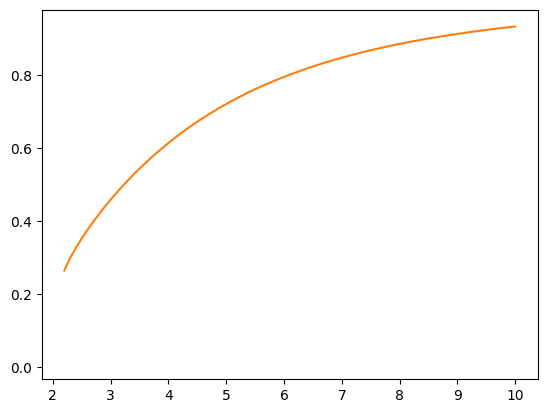

In [97]:
plt.plot(Ks,rs_d)
plt.plot(Ks,rs_u)

In [104]:
A = np.where(np.abs(R*Ks.reshape(-1,1)-Kr)<3e-2)

In [105]:
RR = R*np.ones_like(Ks.reshape(-1,1))
KK = np.ones_like(R)*Ks.reshape(-1,1)

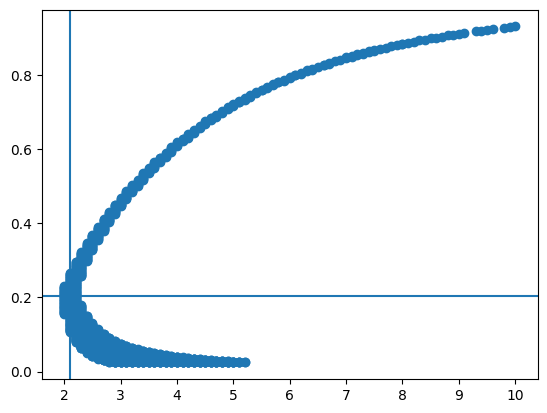

In [106]:
plt.scatter(KK[A],RR[A])
plt.axhline(rb)
plt.axvline(Kb)

In [ ]:
(X/K_)[abs(R@Ks-/K_)<5e-4]

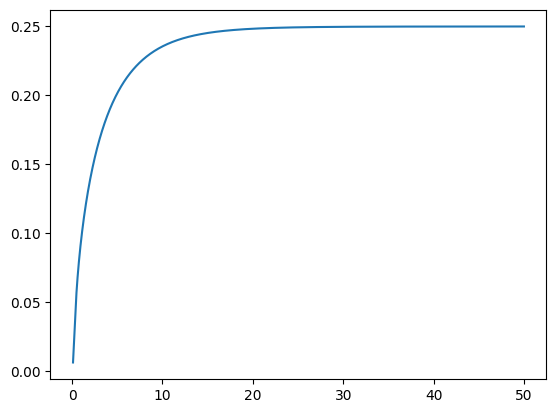

In [66]:
K = 4
plt.plot(Kr,R/K)
# plt.plot(Kr,Kr)
# plt.ylim(0,1)

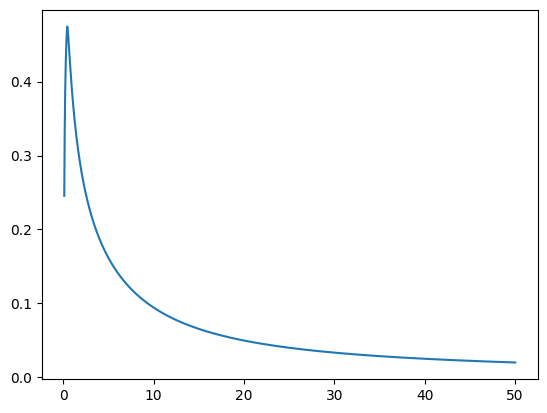

In [67]:
plt.plot(Kr,(R/Kr))
# plt.plot(Ks,1/Ks)

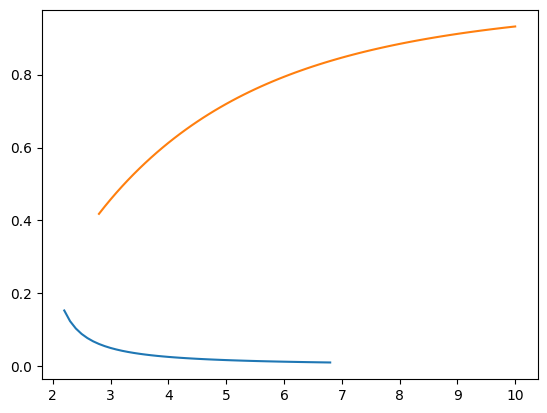

In [10]:
plt.plot(Ks,rs_d)
plt.plot(Ks,rs_u)

In [109]:
from numba import jit
@jit
def get_r_mean(K,m,g=g_n,samples=200):
    rm_u = np.nan
    rm_d = np.nan
    r_1test = np.linspace(1e-4,1,samples)
    F1  = F_mean(r_1test,K,m,g=g)
    cross_point = np.sign((F1[0:-1]-1/K)*(F1[1:]-1/K))*(-0.5) + 0.5
    arg_check, = np.where(cross_point)
    near_check = np.argmin(abs(F1[:]-1/K))
    check_err = abs(F1[near_check] - 1/K)<1e-3
    rm_u = np.nan
    rm_d = np.nan
    if len(arg_check)==2:
        r_ss = []
        for arg in arg_check:
            r_a = r_1test[arg]
            r_b = r_1test[arg+1]
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            if np.isnan(r_m):
                r_m = (r_a+r_b)/2
            r_ss.append(r_m)
        rm_d,rm_u = np.sort(r_ss)
        return rm_d,rm_u
    elif len(arg_check)==1:
        for arg in arg_check:
            r_a = r_1test[arg]
            r_b = r_1test[arg+1]
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            if np.isnan(r_m):
                r_m = (r_a+r_b)/2
        rm_u = r_m
        return rm_d,rm_u
    else:
        if check_err:
            r_a = r_1test[near_check] - 0.1
            r_b = r_1test[near_check] + 0.1
            r_m = Bisection(r_mean,r_a,r_b,eps=1e-3,end=15,arg = (K,m,g))
            print(r_m)
            rm_u = r_m
        return rm_d,rm_u

In [110]:
rm_numpy = np.vectorize(get_r_mean)


In [112]:
Ks

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [113]:
a = rm_numpy(Ks[1:],4)

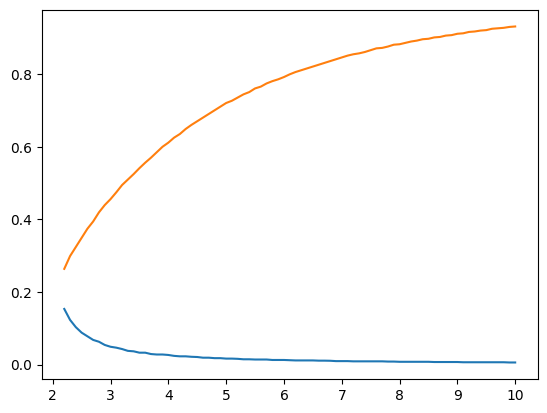

In [116]:
plt.plot(Ks[1:],a[0],Ks[1:],a[1])